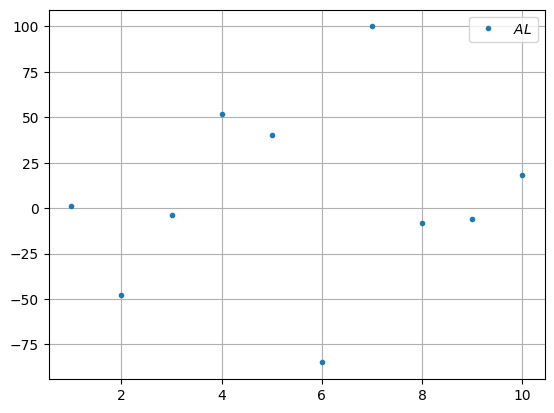

In [3]:
import matplotlib.pyplot as plt 
import numpy as np
from scipy.optimize import curve_fit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

x1=np.arange(1,11)
y1=[1,-48,-4,52,40,-85,100,-8,-6,18]

%matplotlib inline

plt.plot(x1,y1, ".", label = r"$AL$")
plt.grid(True)
plt.legend()
plt.show()

In [4]:
X=np.vstack([x1,np.ones(len(x1))])
X=X.T
print(X) 

[[ 1.  1.]
 [ 2.  1.]
 [ 3.  1.]
 [ 4.  1.]
 [ 5.  1.]
 [ 6.  1.]
 [ 7.  1.]
 [ 8.  1.]
 [ 9.  1.]
 [10.  1.]]


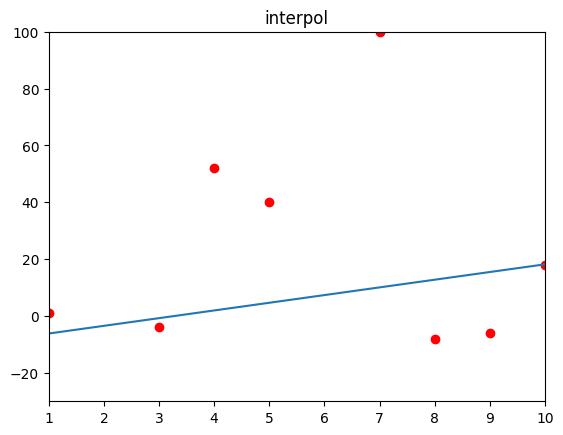

In [5]:
plt.axis([1,10,-30,100])
plt.title('interpol')
plt.plot(x1,y1,'ro')
lsq=np.linalg.lstsq(X,y1,rcond=None)
a,b=lsq[0]
plt.plot(x1, a*x1+b)
plt.show()

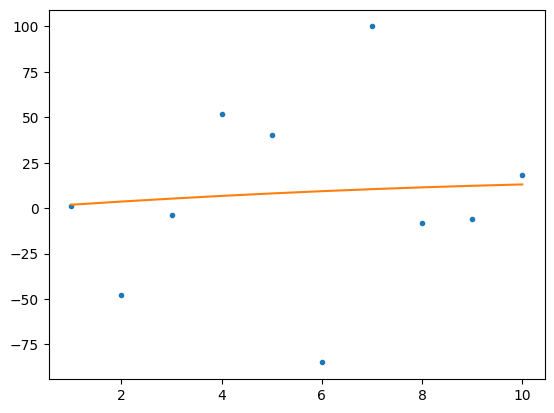

In [6]:
def f(x,a,b):
    return a*x**2+b*x
(a,b), _ = curve_fit(f,x1,y1)

%matplotlib inline
plt.plot(x1,y1,".")
plt.plot(x1,f(x1,a,b))

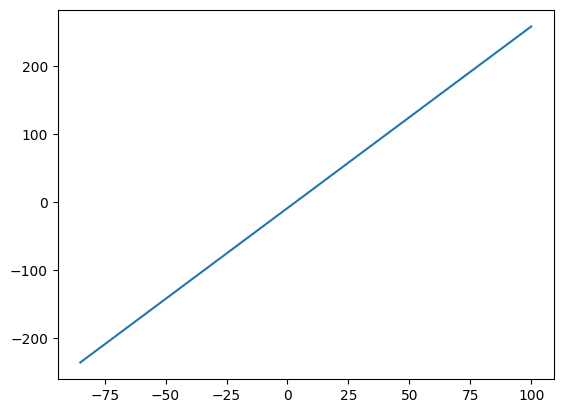

In [7]:
x_m=x1[:,np.newaxis]
model=make_pipeline(PolynomialFeatures(1), Ridge())
model.fit(x_m,y1)
x_long=np.linspace(-85,100)[:,np.newaxis]
y_p=model.predict(x_long)
plt.plot(x_long,y_p)
